In [ ]:
with open('reformatted_reachability.txt', 'r') as f:
    for _ in range(5):  # Read the first 5 lines
        print(f.readline().strip())


FromNodeId ToNodeId Weight
27 0 -757
27 1 -291
27 2 -295
27 3 -341


Sample edges in the graph:
[(27, 0, {'weight': -757.0}), (27, 1, {'weight': -291.0}), (27, 2, {'weight': -295.0}), (27, 3, {'weight': -341.0}), (27, 4, {'weight': -359.0})]
Nodes: 456, Edges: 71959
Average In-Degree: 157.8048245614035, Average Out-Degree: 157.8048245614035


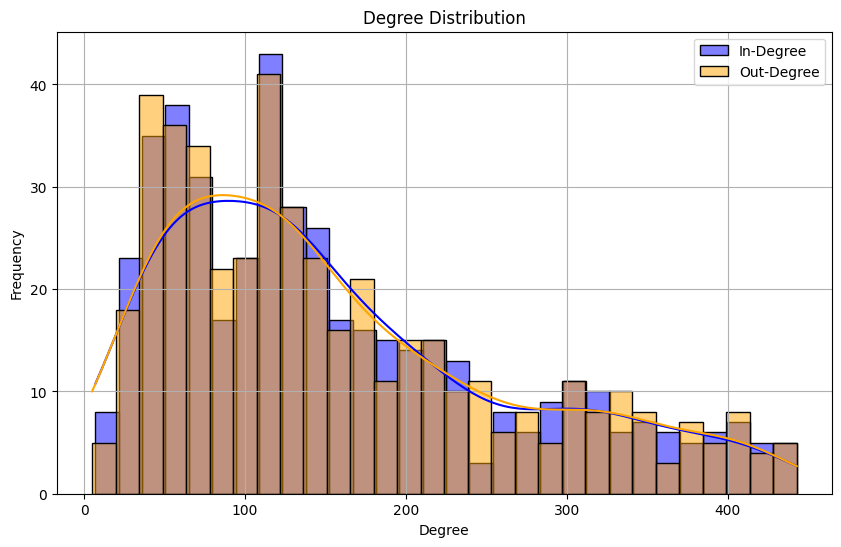

Average Clustering Coefficient: 0.7992185009955751


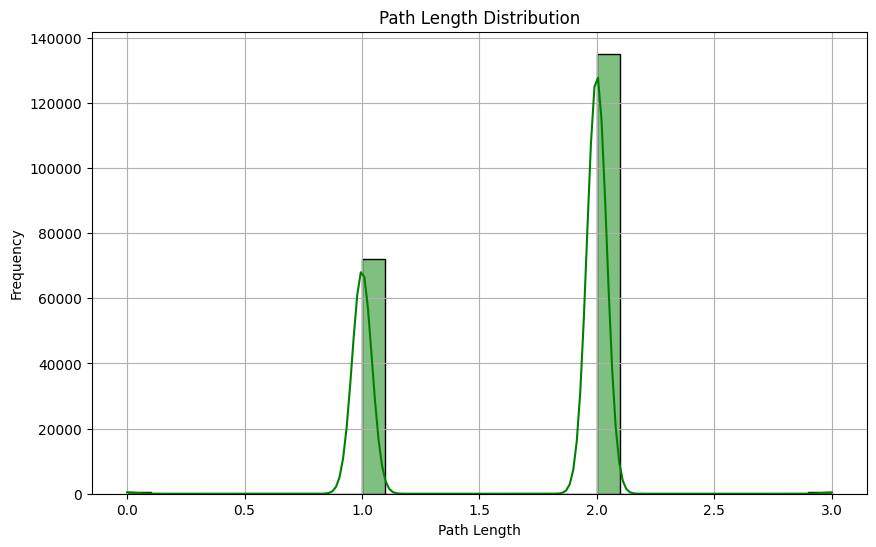

Degree Correlation (Assortativity): -0.38247513428178737


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
# Load the city metadata
metadata = pd.read_csv("reachability-meta.csv")

# Load the directed reachability network, skipping the header
# Set the delimiter to whitespace since your data is space-separated
G = nx.read_edgelist("reformatted_reachability.txt", create_using=nx.DiGraph,
                     nodetype=int, data=(('weight', float),), comments='FromNodeId')

# Check the first few edges to verify
print("Sample edges in the graph:")
print(list(G.edges(data=True))[:5])

# Check basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Nodes: {num_nodes}, Edges: {num_edges}")

# Calculate average in-degree and out-degree
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

avg_in_degree = sum(in_degrees) / num_nodes
avg_out_degree = sum(out_degrees) / num_nodes
print(f"Average In-Degree: {avg_in_degree}, Average Out-Degree: {avg_out_degree}")

# Degree distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(in_degrees, bins=30, kde=True, color='blue', label='In-Degree')
sns.histplot(out_degrees, bins=30, kde=True, color='orange', label='Out-Degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.legend()
plt.grid()
plt.show()

# Average Clustering Coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")

# Analyzing Path Lengths
path_lengths = dict(nx.all_pairs_shortest_path_length(G))
lengths = [length for target in path_lengths.values() for length in target.values()]

# Path Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(lengths, bins=30, kde=True, color='green')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.title('Path Length Distribution')
plt.grid()
plt.show()

# Small World Properties
degree_correlation = nx.degree_pearson_correlation_coefficient(G)
print(f"Degree Correlation (Assortativity): {degree_correlation}")


In [ ]:
import pandas as pd
import networkx as nx

# Load the city metadata
metadata = pd.read_csv("reachability-meta.csv")

# Load the directed reachability network, skipping the header
G = nx.read_edgelist("reformatted_reachability.txt", create_using=nx.DiGraph,
                     nodetype=int, data=(('weight', float),), comments='FromNodeId')

# Calculate the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Determine the type of graph
graph_type = "Directed" if G.is_directed() else "Undirected"

# Calculate average in-degree and out-degree
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

avg_in_degree = sum(in_degrees) / num_nodes if num_nodes > 0 else 0
avg_out_degree = sum(out_degrees) / num_nodes if num_nodes > 0 else 0

# Display the results
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Type of Graph: {graph_type}")
print(f"Average In-Degree: {avg_in_degree:.2f}")
print(f"Average Out-Degree: {avg_out_degree:.2f}")


Number of Nodes: 456
Number of Edges: 71959
Type of Graph: Directed
Average In-Degree: 157.80
Average Out-Degree: 157.80


In [ ]:
import pandas as pd
import networkx as nx

# Load the city metadata
metadata = pd.read_csv("reachability-meta.csv")

# Create a set of valid node IDs from the metadata
valid_node_ids = set(metadata['node_id'])

# Initialize the directed reachability network
G = nx.DiGraph()

# Initialize a counter for edges
total_edges_read = 0

# Read the edges from the file
with open("reformatted_reachability.txt") as f:
    # Skip the header line
    next(f)
    for line in f:
        total_edges_read += 1  # Count the total edges read
        # Split the line into components
        parts = line.strip().split()
        if len(parts) == 3:  # Ensure there are exactly 3 parts (FromNodeId, ToNodeId, Weight)
            from_node, to_node, weight = parts
            try:
                # Convert node IDs and weight to appropriate types
                from_node = int(from_node)
                to_node = int(to_node)
                weight = float(weight)


                # Add edge only if both nodes are valid
                if from_node in valid_node_ids and to_node in valid_node_ids:
                    G.add_edge(from_node, to_node, weight=weight)
            except ValueError:
                print(f"Invalid edge data: {line.strip()}")  # Log invalid lines

# Calculate the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Determine the type of graph
graph_type = "Directed" if G.is_directed() else "Undirected"

# Calculate average in-degree and out-degree
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

avg_in_degree = sum(in_degrees) / num_nodes if num_nodes > 0 else 0
avg_out_degree = sum(out_degrees) / num_nodes if num_nodes > 0 else 0

# Display the results
print(f"Number of edges read:{total_edges_read}")
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Type of Graph: {graph_type}")
print(f"Average In-Degree: {avg_in_degree:.2f}")
print(f"Average Out-Degree: {avg_out_degree:.2f}")


Number of edges read:71959
Number of Nodes: 456
Number of Edges: 71959
Type of Graph: Directed
Average In-Degree: 157.80
Average Out-Degree: 157.80


### Plotting the correlation between in-degree ${k_{in}}$ and out-degree ${ k_{out}}$ of the Airline travel reachability network.

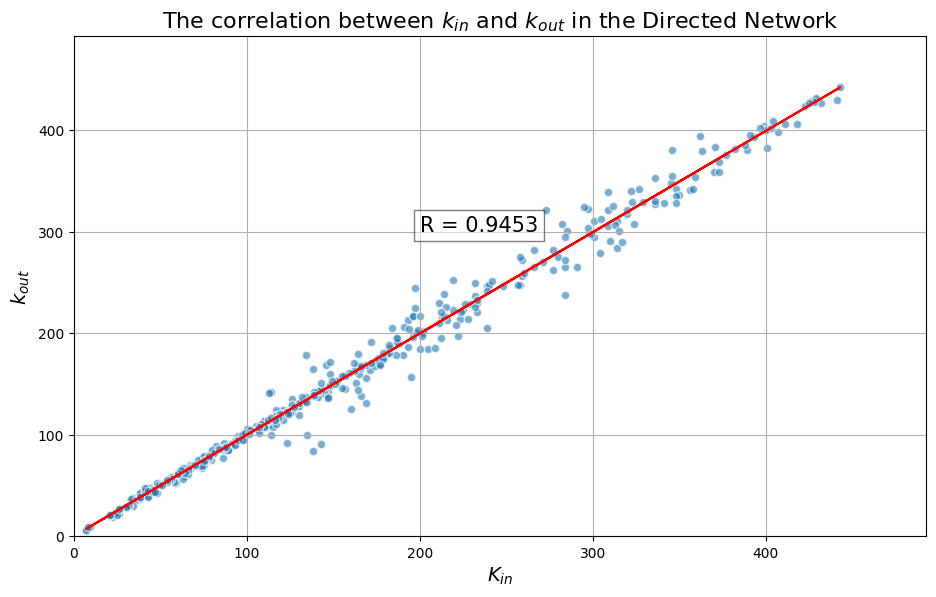

In [ ]:

# Calculate in-degrees and out-degrees
indegree_sequence = [d for n, d in G.in_degree()]
outdegree_sequence = [d for n, d in G.out_degree()]

# Count occurrences of in-degrees and out-degrees (if needed)
indegreeCount = collections.Counter(indegree_sequence)
outdegreeCount = collections.Counter(outdegree_sequence)

# Create the scatter plot for in-degrees and out-degrees
plt.figure(figsize=(11, 6.5))
plt.scatter(indegree_sequence, outdegree_sequence, alpha=0.6, edgecolors='w')
plt.xlabel("$\it{K_{in}}$", fontsize=14)
plt.ylabel("$\it{k_{out}}$", fontsize=14)

# Calculate the reciprocity of the graph
reciprocity_value = nx.reciprocity(G)

# Adjust the position of the text inside the plot
plt.text(200, 300, f"R = {round(reciprocity_value, 4)}", fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

# Fit a line to the data
m, b = np.polyfit(np.array(indegree_sequence), np.array(outdegree_sequence), 1)
plt.plot(np.array(indegree_sequence), m * np.array(indegree_sequence) + b, color='r')

# Set title and show plot
plt.title("The correlation between ${k_{in}}$ and ${k_{out}}$ in the Directed Network", fontsize=16)
plt.grid()
plt.xlim(0, max(indegree_sequence) + 50)  # Adjust x-axis limit if necessary
plt.ylim(0, max(outdegree_sequence) + 50)  # Adjust y-axis limit if necessary
plt.show()

The scatter plot you created illustrates the relationship between the in-degrees and out-degrees of nodes in your directed network (in this case, the transportation reachability network). Here’s a breakdown of what each component of the plot represents and what it can reveal about the network:

Components of the Plot
Axes:

X-Axis (
𝐾
𝑖
𝑛
K
in
​
 ): Represents the in-degree of nodes, which is the number of incoming edges to a node. In this context, it reflects how many other cities have direct connections (or airline routes) leading into a particular city.
Y-Axis (
𝑘
𝑜
𝑢
𝑡
k
out
​
 ): Represents the out-degree of nodes, which is the number of outgoing edges from a node. This indicates how many direct connections a city has to other cities.
Points:

Each point on the plot corresponds to a city in the network. The coordinates of each point reflect the in-degree and out-degree of that specific city.
Red Line:

The red line represents the best-fit linear regression line calculated from the data points. This line helps visualize the correlation between in-degrees and out-degrees in the network.
Reciprocity Value (
𝑅
R):

The value of
𝑅
R displayed on the plot indicates the reciprocity of the directed network. Reciprocity measures the likelihood that two nodes will form mutual connections. A higher
𝑅
R value indicates that if a city has a direct route to another city, that city is likely to have a direct route back.
What the Plot Shows
Correlation:

The scatter plot visually depicts the correlation between in-degrees and out-degrees. If the points cluster around the red line, it suggests a positive correlation: cities that have many incoming connections also tend to have many outgoing connections.
Network Structure:

The shape and spread of the points can reveal the network structure. For instance:
Linear Relationship: A strong linear relationship suggests that cities are similarly connected. Cities with many connections to others are likely to be well-connected themselves.
Diverse Connections: A wide spread in points can indicate diversity in connectivity; some cities may be hubs with many connections, while others may have few.
High Reciprocity:

If the reciprocity value
𝑅
R is high, it indicates that there are many mutual connections between cities, suggesting a more interconnected network. This can be important for understanding travel dynamics and the flow of passengers.
Network Analysis:

The analysis of in-degrees and out-degrees can help identify key nodes (cities) in the network. For example, cities with high out-degrees may serve as major hubs in the airline network, while those with high in-degrees may be significant destinations.
Conclusion
Overall, this plot is a powerful visualization tool for understanding the connectivity and dynamics of your transportation reachability network. By analyzing the in-degree and out-degree relationships, you can gain insights into the structure and behavior of the network, which can inform decisions regarding transportation planning, route optimization, and other related analyses.

In [ ]:
import folium
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Load the edges and metadata
edges = pd.read_csv("reformatted_reachability.txt", sep='\s+', skiprows=1, names=['FromNodeId', 'ToNodeId', 'Weight'])
metadata = pd.read_csv("reachability-meta.csv")

# Create the directed graph
G = nx.DiGraph()
for index, row in edges.iterrows():
    G.add_edge(row['FromNodeId'], row['ToNodeId'], weight=row['Weight'])
# Calculate the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

Number of Nodes: 456
Number of Edges: 71959


In [ ]:
# Function to print top 10 nodes based on a centrality measure
def print_top_nodes(measure_name, formatted_name):
    top_nodes = metadata.nlargest(10, measure_name)
    print(f"\n{formatted_name.upper()}")
    print(f"\t{'NODE NAME'.ljust(30)}\t{formatted_name}")  # Header for alignment
    print("\t" + "-"*50)  # Divider
    for _, row in top_nodes.iterrows():
        print(f"\t{row['name'].ljust(30)}\t{row[measure_name]:.16f}")  # Align name and value
    return top_nodes

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
metadata['Degree Centrality'] = metadata['node_id'].map(degree_centrality)
# Display top 10 nodes for Degree centrality measure
degree_top_nodes = print_top_nodes('Degree Centrality', "Degree Centrality")


DEGREE CENTRALITY
	NODE NAME                     	Degree Centrality
	--------------------------------------------------
	Los Angeles, CA               	1.9472527472527472
	San Francisco, CA             	1.9142857142857144
	Las Vegas, NV                 	1.8923076923076922
	Chicago, IL                   	1.8879120879120879
	Dallas/Fort Worth, TX         	1.8879120879120879
	Denver, CO                    	1.8813186813186813
	New York, NY                  	1.8813186813186813
	Washington, DC                	1.8725274725274725
	Phoenix, AZ                   	1.8615384615384616
	Seattle/Tacoma, WA            	1.8109890109890110


In [ ]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
metadata['Betweenness Centrality'] = metadata['node_id'].map(betweenness_centrality)
# Display top 10 nodes for Betweenness centrality measure
betweenness_top_nodes = print_top_nodes('Betweenness Centrality', "Betweenness Centrality")


BETWEENNESS CENTRALITY
	NODE NAME                     	Betweenness Centrality
	--------------------------------------------------
	Los Angeles, CA               	0.0175667117662265
	Denver, CO                    	0.0166321036778162
	New York, NY                  	0.0159643253400736
	Toronto, ON                   	0.0159525424342283
	San Francisco, CA             	0.0158071746326704
	Chicago, IL                   	0.0157367061417342
	Las Vegas, NV                 	0.0152828756646582
	Washington, DC                	0.0150496044596145
	Dallas/Fort Worth, TX         	0.0149816565670056
	Phoenix, AZ                   	0.0136287654563946


In [ ]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
metadata['Closeness Centrality'] = metadata['node_id'].map(closeness_centrality)
# Display top 10 nodes for Closeness centrality measure
closeness_top_nodes = print_top_nodes('Closeness Centrality', "Closeness Centrality")


CLOSENESS CENTRALITY
	NODE NAME                     	Closeness Centrality
	--------------------------------------------------
	Los Angeles, CA               	0.9743040685224840
	San Francisco, CA             	0.9701492537313433
	Dallas/Fort Worth, TX         	0.9518828451882845
	Chicago, IL                   	0.9459459459459459
	Las Vegas, NV                 	0.9459459459459459
	New York, NY                  	0.9439834024896265
	Denver, CO                    	0.9420289855072463
	Washington, DC                	0.9381443298969072
	Phoenix, AZ                   	0.9342915811088296
	Seattle/Tacoma, WA            	0.9247967479674797


In [ ]:
# Calculate eigenvector centrality with error handling
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=200, tol=1.0e-6)
except nx.PowerIterationFailedConvergence:
    print("Eigenvector centrality failed to converge, using fallback values.")
    eigenvector_centrality = {n: 0 for n in G.nodes()}  # Assign zero if it fails

metadata['Eigenvector Centrality'] = metadata['node_id'].map(eigenvector_centrality)
# Display top 10 nodes for Eigenvector centrality measure
eigenvector_top_nodes = print_top_nodes('Eigenvector Centrality', "Eigenvector Centrality")


EIGENVECTOR CENTRALITY
	NODE NAME                     	Eigenvector Centrality
	--------------------------------------------------
	Los Angeles, CA               	0.0856777154044639
	San Francisco, CA             	0.0853927004540004
	Dallas/Fort Worth, TX         	0.0850968998143060
	Las Vegas, NV                 	0.0848240374317143
	Chicago, IL                   	0.0846938249979687
	Denver, CO                    	0.0846194627077885
	Phoenix, AZ                   	0.0846065559039973
	Seattle/Tacoma, WA            	0.0843951054396787
	Washington, DC                	0.0840013573724908
	Minneapolis/St Paul, MN       	0.0837685091524955


In [ ]:
# Normalize the centrality measures for better visualization
scaler = MinMaxScaler()
metadata[['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']] = scaler.fit_transform(
    metadata[['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']]
)

In [ ]:
# Function to create a Folium map for a specific centrality property
def create_map(property_name):
    map_center = [metadata['latitude'].mean(), metadata['longitude'].mean()]
    map_ = folium.Map(location=map_center, zoom_start=12)

    # Get the top 10 nodes based on the current centrality property
    top_nodes = metadata.nlargest(10, property_name)

    for _, row in top_nodes.iterrows():
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=row[property_name] * 20,  # Scale the radius based on the property
            color='blue',
            fill=True,
            fill_opacity=0.6,
            popup=(f"Node ID: {row['node_id']}\n"
                   f"Name: {row['name']}\n"  # Add the node name
                   f"{property_name.replace('_', ' ').title()}: {row[property_name]:.2f}")  # Add the centrality measure
        ).add_to(map_)

    # Save the map to an HTML file
    map_.save(f"{property_name}_map.html")

# Create maps for each centrality property
create_map('Degree Centrality')
create_map('Betweenness Centrality')
create_map('Closeness Centrality')
create_map('Eigenvector Centrality')

print("Maps created and top 10 nodes displayed for Degree Centrality, Betweenness Centrality, Closeness Centrality, and Eigenvector Centrality.")


Maps created and top 10 nodes displayed for Degree Centrality, Betweenness Centrality, Closeness Centrality, and Eigenvector Centrality.


1. Clustering Coefficient

In [ ]:
# Calculate clustering coefficient
clustering_coefficient = nx.clustering(G)
metadata['Clustering Coefficient'] = metadata['node_id'].map(clustering_coefficient)

# Calculate average clustering coefficient for the whole graph
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.4f}")

Average Clustering Coefficient: 0.7992


2. Assortativity Coefficient

In [ ]:
# Calculate assortativity coefficient
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print(f"Assortativity Coefficient: {assortativity_coefficient:.4f}")


Assortativity Coefficient: -0.3825


3. Diameter

In [ ]:
# Calculate diameter
if nx.is_connected(G.to_undirected()):
    diameter = nx.diameter(G.to_undirected())
    print(f"Diameter of the graph: {diameter}")
else:
    print("Graph is not connected; diameter cannot be computed.")


Diameter of the graph: 3


4. Average Path Length

In [ ]:
# Calculate average path length
if nx.is_connected(G.to_undirected()):
    average_path_length = nx.average_shortest_path_length(G.to_undirected())
    print(f"Average Path Length: {average_path_length:.4f}")
else:
    print("Graph is not connected; average path length cannot be computed.")


Average Path Length: 1.6357


5. Reachability

In [ ]:
# Calculate reachability
reachability = {node: len(nx.single_source_shortest_path_length(G, node)) for node in G.nodes()}
metadata['Reachability'] = metadata['node_id'].map(reachability)

# Display reachability for the top 10 nodes
top_reachability = metadata.nlargest(10, 'Reachability')
formatted_name="Reachability"
measure_name="Reachability"
print("Top 10 Nodes by Reachability:")
print(f"\n{formatted_name.upper()}")
print(f"\t{'NODE NAME'.ljust(30)}\t{formatted_name}")
print("\t" + "-"*50)
for _, row in top_reachability.iterrows():
     print(f"\t{row['name'].ljust(30)}\t{row[measure_name]:.16f}")


Top 10 Nodes by Reachability:

REACHABILITY
	NODE NAME                     	Reachability
	--------------------------------------------------
	Abbotsford, BC                	456.0000000000000000
	Aberdeen, SD                  	456.0000000000000000
	Abilene, TX                   	456.0000000000000000
	Akron/Canton, OH              	456.0000000000000000
	Alamosa, CO                   	456.0000000000000000
	Albany, GA                    	456.0000000000000000
	Albany, NY                    	456.0000000000000000
	Albuquerque, NM               	456.0000000000000000
	Alexandria, LA                	456.0000000000000000
	Allentown/Bethlehem/Easton, PA	456.0000000000000000


7. Flow Betweenness Centrality

In [ ]:
# Calculate flow betweenness centrality
flow_betweenness = nx.betweenness_centrality(G, weight='weight')
metadata['Flow Betweenness Centrality'] = metadata['node_id'].map(flow_betweenness)

# Display top 10 nodes based on flow betweenness centrality
top_flow_betweenness = metadata.nlargest(10, 'Flow Betweenness Centrality')
formatted_name = "Flow Betweenness Centrality"
measure_name = 'Flow Betweenness Centrality'

print("\nTop 10 Nodes by Flow Betweenness Centrality:")
print(f"\n{formatted_name.upper()}")
print(f"\t{'NODE NAME'.ljust(30)}\t{formatted_name}")
print("\t" + "-" * 50)

for _, row in top_flow_betweenness.iterrows():
    print(f"\t{row['name'].ljust(30)}\t{row[measure_name]:.16f}")



Top 10 Nodes by Flow Betweenness Centrality:

FLOW BETWEENNESS CENTRALITY
	NODE NAME                     	Flow Betweenness Centrality
	--------------------------------------------------
	Kona, HI                      	0.9713753207145277
	Kahului, HI                   	0.9699423924093526
	Greenbrier, WV                	0.9692743379968048
	Telluride, CO                 	0.9689596746865469
	Victoria, TX                  	0.9680544125478046
	Buffalo, NY                   	0.9669942392409352
	Manchester, NH                	0.9668828968388439
	Aspen, CO                     	0.9648109599651449
	Hilo, HI                      	0.9647625502251053
	Hartford, CT                  	0.9641961562666408


In [ ]:
import networkx as nx
import pandas as pd

# Load the edges and metadata
edges = pd.read_csv("reformatted_reachability.txt", sep='\s+', skiprows=1, names=['FromNodeId', 'ToNodeId', 'Weight'])
metadata = pd.read_csv("reachability-meta.csv")

# Create the directed graph
G = nx.DiGraph()
for index, row in edges.iterrows():
    G.add_edge(row['FromNodeId'], row['ToNodeId'], weight=row['Weight'])

# Identify strongly connected components
components = list(nx.strongly_connected_components(G))

# Check for disconnected nodes
if len(components) > 1:
    print("The graph is disconnected.")
    for i, component in enumerate(components):
        print(f"\nComponent {i + 1}:")
        print(f"Nodes: {component}")

    # Identify all nodes in the graph
    all_nodes = set(G.nodes())
    # Find disconnected nodes
    disconnected_nodes = all_nodes - set.union(*components)
    print(f"\nDisconnected Nodes: {disconnected_nodes}")

    # Identify all edges in the graph
    all_edges = set(G.edges())
    # Find edges that connect nodes from different components
    disconnected_edges = [edge for edge in all_edges if edge[0] in disconnected_nodes or edge[1] in disconnected_nodes]
    print(f"\nDisconnected Edges: {disconnected_edges}")
else:
    print("The graph is connected.")

# If needed, calculate diameter and average path length for the largest component
if len(components) == 1:
    diameter = nx.diameter(G)
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"\nDiameter of the graph: {diameter}")
    print(f"Average Path Length: {avg_path_length}")


The graph is connected.

Diameter of the graph: 3
Average Path Length: 1.6551426643531906


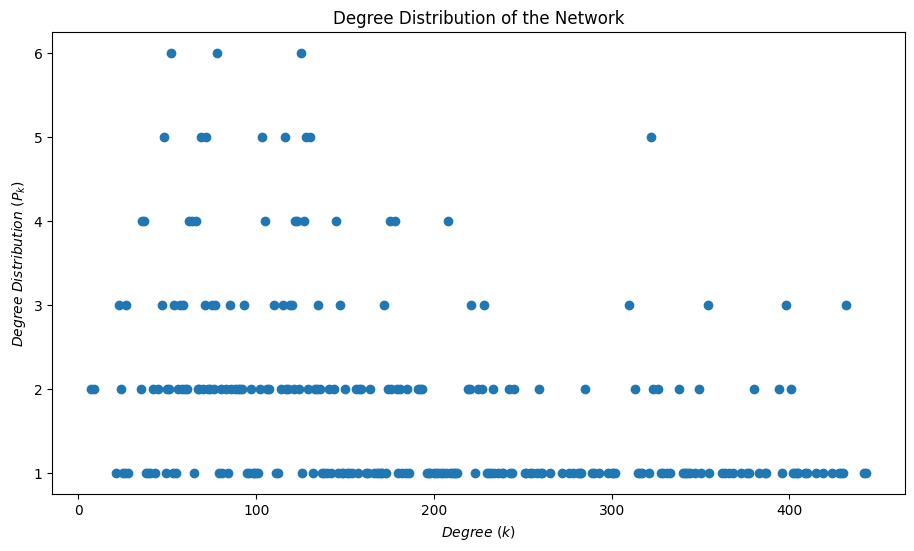

In [33]:
import networkx as nx
import pandas as pd
import collections
import matplotlib.pyplot as plt

# Load edge data from the text file
edge_data = pd.read_csv('reformatted_reachability.txt', sep=' ')
G = nx.from_pandas_edgelist(edge_data, 'FromNodeId', 'ToNodeId', ['Weight'], create_using=nx.DiGraph())

# Convert the directed graph to undirected for degree distribution analysis
G_Undirected = G.to_undirected()

def Calculate_Degree_Distribution(G_Undirected):
    # Get degree distribution
    degree_sequence = sorted([d for n, d in G_Undirected.degree()])
    degreeCount = collections.Counter(degree_sequence)
    degree, count = zip(*degreeCount.items())

    # Plot degree distribution
    plt.figure(figsize=(11, 6))
    plt.scatter(degree, count)
    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Degree\ Distribution\ (P_k)}$")
    plt.title("Degree Distribution of the Network")
    plt.show()

# Calculate and plot the degree distribution
Calculate_Degree_Distribution(G_Undirected)


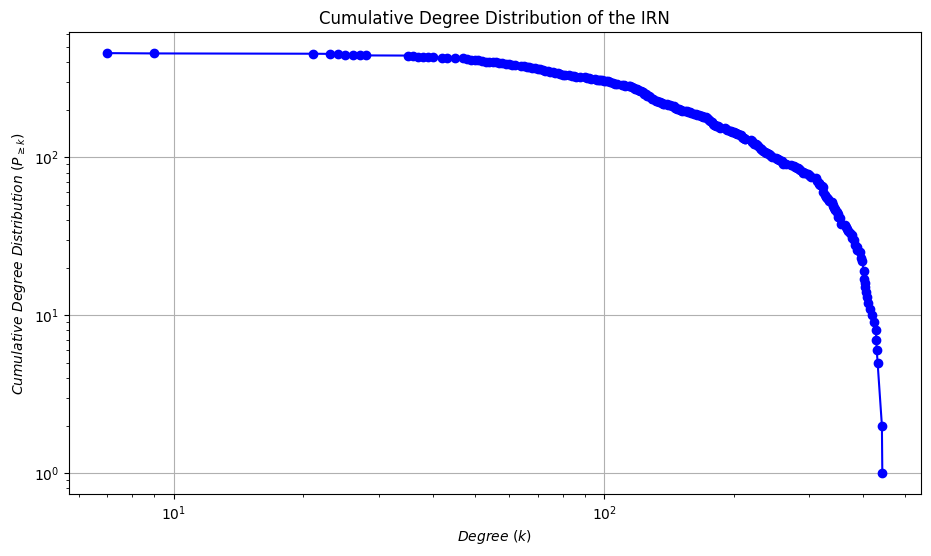

In [8]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np

def plot_cumulative_degree_distribution(Railway_Network_Undirected):
    # Calculate the degree sequence
    degree_sequence = sorted([d for _, d in Railway_Network_Undirected.degree()])

    # Count the occurrences of each degree
    degree_count = collections.Counter(degree_sequence)

    # Calculate the cumulative distribution
    degrees, counts = zip(*sorted(degree_count.items()))
    cumulative_counts = np.cumsum(counts[::-1])[::-1]  # Reverse cumulative sum

    # Plotting the cumulative degree distribution
    plt.figure(figsize=(11, 6))
    plt.plot(degrees, cumulative_counts, marker='o', linestyle='-', color='b')
    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Cumulative\ Degree\ Distribution\ (P_{\geq k})}$")
    plt.title("Cumulative Degree Distribution of the IRN")
    plt.yscale("log")  # Optional: Use log scale for better visibility of distributions
    plt.xscale("log")  # Optional: Use log scale for better visibility of distributions
    plt.grid(True)
    plt.show()

# Example usage (replace Railway_Network_Undirected with your actual undirected graph)
plot_cumulative_degree_distribution(G)


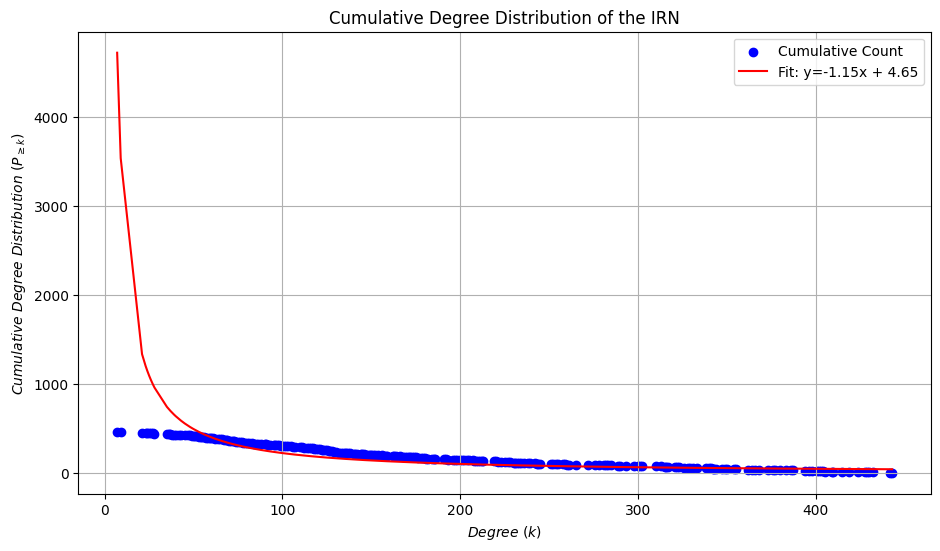

In [10]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np

def Calculate_Cumulative_Degree_Distribution(Railway_Network_Undirected):
    # Calculate the degree sequence and count occurrences
    degree_sequence = sorted([d for _, d in Railway_Network_Undirected.degree()])
    degree_count = collections.Counter(degree_sequence)

    # Separate the degrees and their respective counts
    degree, count = zip(*sorted(degree_count.items()))

    # Calculate the cumulative count in reverse order
    cumulative_count = np.cumsum(count[::-1])[::-1]

    # Plot the cumulative degree distribution
    plt.figure(figsize=(11, 6))
    plt.scatter(degree, cumulative_count, color='b', label="Cumulative Count")

    # Add linear fit line
    m, b = np.polyfit(np.log10(degree), np.log10(cumulative_count), 1)
    plt.plot(degree, 10**(m * np.log10(degree) + b), color='r', label=f"Fit: y={m:.2f}x + {b:.2f}")

    # Label the axes
    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Cumulative\ Degree\ Distribution\ (P_{\geq k})}$")

    # Title and legend
    plt.title("Cumulative Degree Distribution of the IRN")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
Calculate_Cumulative_Degree_Distribution(G)


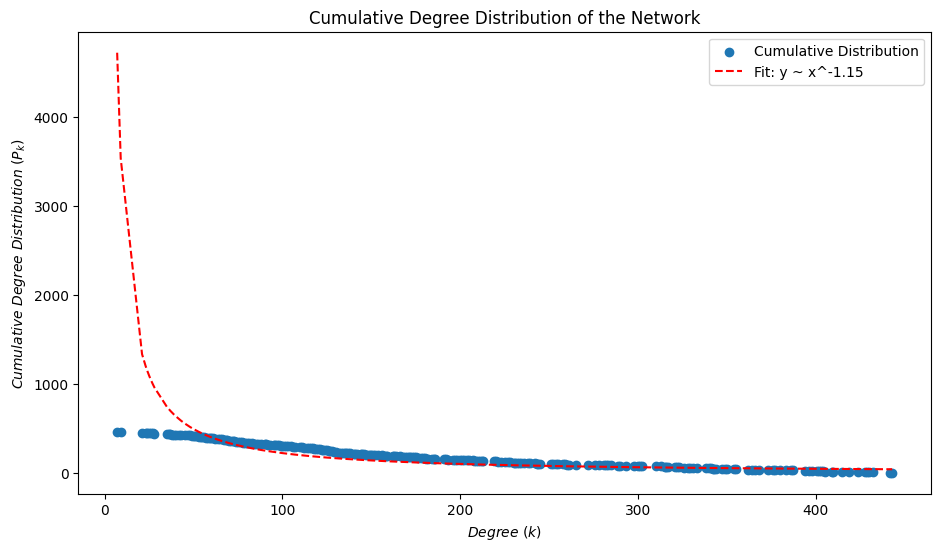

In [35]:
import networkx as nx
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt

# Load edge data from the text file and construct the directed graph
edge_data = pd.read_csv('reformatted_reachability.txt', sep=' ')
G = nx.from_pandas_edgelist(edge_data, 'FromNodeId', 'ToNodeId', ['Weight'], create_using=nx.DiGraph())

# Convert to undirected graph
G_Undirected = G.to_undirected()

def Calculate_Cumulative_Degree_Distribution(G_Undirected):
    # Calculate degree sequence and distribution
    degree_sequence = sorted([d for n, d in G_Undirected.degree()])
    degreeCount = collections.Counter(degree_sequence)
    degree, count = zip(*degreeCount.items())

    # Compute cumulative distribution
    cumulative_count = np.cumsum(count[::-1])[::-1]

    # Plot cumulative degree distribution
    plt.figure(figsize=(11, 6))
    plt.scatter(degree, cumulative_count, label="Cumulative Distribution")

    # Fit a line to the log-log plot to check for power-law
    m, b = np.polyfit(np.log10(degree), np.log10(cumulative_count), 1)
    plt.plot(degree, 10**(m * np.log10(degree) + b), color='r', linestyle='--', label=f"Fit: y ~ x^{m:.2f}")

    # Add labels and title
    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Cumulative\ Degree\ Distribution\ (P_k)}$")
    plt.title("Cumulative Degree Distribution of the Network")
    plt.legend()
    plt.show()

# Calculate and plot the cumulative degree distribution
Calculate_Cumulative_Degree_Distribution(G_Undirected)


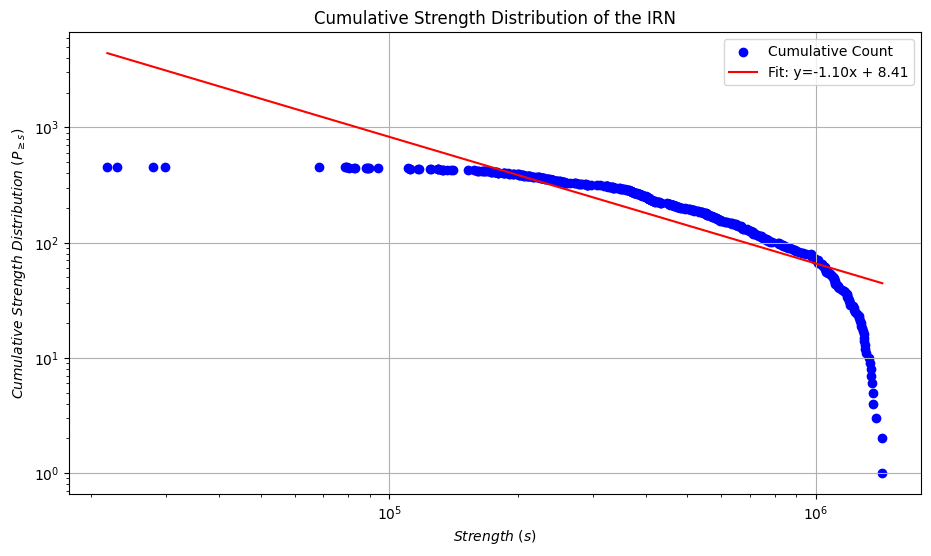

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def convert_negative_weights(Railway_Network_Undirected):
    # Get all weights from the graph
    weights = nx.get_edge_attributes(Railway_Network_Undirected, 'weight').values()

    # Find the minimum weight
    min_weight = min(weights)

    # Create a new graph with updated weights
    updated_graph = nx.Graph()

    for u, v, w in Railway_Network_Undirected.edges(data='weight'):
        if w < 0:
            # Convert negative weights to positive
            new_weight = abs(w) + abs(min_weight) + 1  # Adding a shift
        else:
            new_weight = w

        updated_graph.add_edge(u, v, weight=new_weight)

    return updated_graph

def Calculate_Cumulative_Strength_Distribution(Railway_Network_Undirected):
    updated_graph = convert_negative_weights(Railway_Network_Undirected)

    # Calculate the strength (weighted degree) sequence
    strength_sequence = sorted([d for _, d in updated_graph.degree(weight='weight')])
    strength_count = collections.Counter(strength_sequence)

    # Separate the strengths and their respective counts
    strength, count = zip(*sorted(strength_count.items()))

    # Convert to lists for easier manipulation
    strength = list(strength)
    count = list(count)

    # Calculate the cumulative count in reverse order
    cumulative_count = np.cumsum(count[::-1])[::-1]

    # Filter out zero and negative values for logarithmic transformation
    valid_indices = np.where((np.array(strength) > 0) & (np.array(cumulative_count) > 0))
    strength = np.array(strength)[valid_indices]
    cumulative_count = np.array(cumulative_count)[valid_indices]

    if len(strength) == 0 or len(cumulative_count) == 0:
        print("No valid data points for strength and cumulative count.")
        return

    # Plot the cumulative strength distribution
    plt.figure(figsize=(11, 6))
    plt.scatter(strength, cumulative_count, color='b', label="Cumulative Count")

    # Add linear fit line in log-log space
    try:
        m, b = np.polyfit(np.log10(strength), np.log10(cumulative_count), 1)
        plt.plot(strength, 10**(m * np.log10(strength) + b), color='r', label=f"Fit: y={m:.2f}x + {b:.2f}")
    except np.linalg.LinAlgError:
        print("Error fitting linear regression: SVD did not converge.")
        return

    # Label the axes
    plt.xlabel("$\it{Strength\ (s)}$")
    plt.ylabel("$\it{Cumulative\ Strength\ Distribution\ (P_{\geq s})}$")
    plt.yscale("log")  # Log scale for better visibility of distributions
    plt.xscale("log")  # Log scale for better visibility of distributions

    # Title and legend
    plt.title("Cumulative Strength Distribution of the IRN")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
Calculate_Cumulative_Strength_Distribution(G)


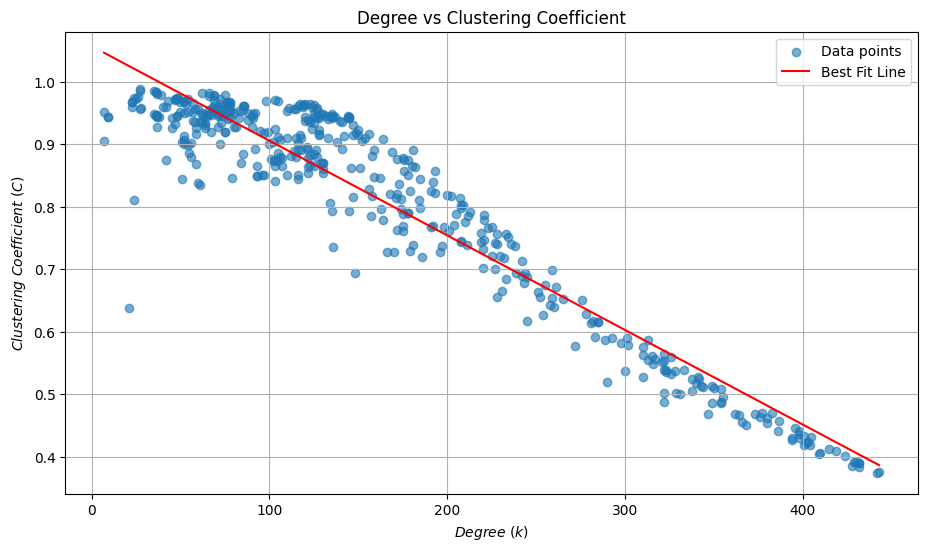

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

def plot_degree_vs_clustering_coefficient(Railway_Network_Undirected):
    # Calculate degree for each node
    degrees = dict(Railway_Network_Undirected.degree())

    # Calculate clustering coefficients for each node
    clustering_coeffs = nx.clustering(Railway_Network_Undirected)

    # Prepare data for plotting
    degree_values = np.array(list(degrees.values()))
    clustering_values = np.array(list(clustering_coeffs.values()))

    # Create scatter plot
    plt.figure(figsize=(11, 6))
    plt.scatter(degree_values, clustering_values, alpha=0.6, label='Data points')

    # Fit a linear regression line
    m, b = np.polyfit(degree_values, clustering_values, 1)

    # Generate x values for the best-fit line
    x_fit = np.linspace(min(degree_values), max(degree_values), 100)
    y_fit = m * x_fit + b

    # Plot the best-fit line
    plt.plot(x_fit, y_fit, color='red', label='Best Fit Line')

    # Set labels and title
    plt.xlabel("$\it{Degree\ (k)}$")
    plt.ylabel("$\it{Clustering\ Coefficient\ (C)}$")
    plt.title("Degree vs Clustering Coefficient")

    # Add grid for better readability
    plt.grid(True)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
plot_degree_vs_clustering_coefficient(G)


In [20]:
import networkx as nx

def analyze_path_length(G):
    # Create a dictionary to store path lengths
    Path_Lengths = {}

    # Compute shortest path lengths for all pairs of nodes
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

    # Iterate through the computed shortest path lengths
    for source_station, destination_stations in shortest_path_lengths.items():
        for station, length in destination_stations.items():
            # Store path lengths in the dictionary
            Path_Lengths[(source_station, station)] = length

    return Path_Lengths

# Example usage
Path_Lengths = analyze_path_length(G)


{0: 456, 1: 75894, 2: 131276, 3: 310} 



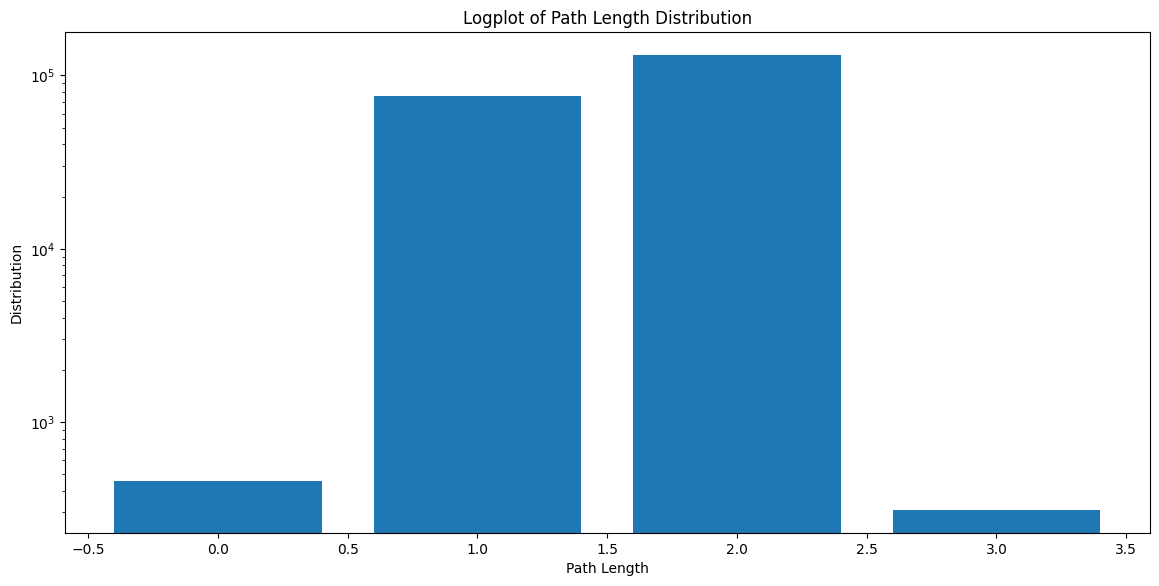

In [21]:
import collections
import matplotlib.pyplot as plt

# Calculate the path length distribution
def Calculate_Path_Length_Distribution(Path_Lengths):
    # Extract path lengths
    path_length_sequence = Path_Lengths.values()
    # Count occurrences of each path length
    path_lengthCount = collections.Counter(path_length_sequence)

    # Unzip the counts into separate lists
    path_length, count = zip(*path_lengthCount.items())

    return path_length, count

# Example usage with the Path_Lengths dictionary obtained from your previous analysis
shortest_path_lengths, shortest_path_length_values = Calculate_Path_Length_Distribution(Path_Lengths)
path_length_distribution = {shortest_path_lengths[i]: shortest_path_length_values[i] for i in range(len(shortest_path_lengths))}

# Print the path length distribution
print(path_length_distribution, "\n")

# Plotting the path length distribution
plt.figure(figsize=(14, 6.5))
plt.bar(path_length_distribution.keys(), path_length_distribution.values())
plt.xlabel("Path Length")
plt.ylabel("Distribution")
plt.yscale('log')  # Logarithmic scale for the y-axis
plt.title("Logplot of Path Length Distribution")

# Show the plot
plt.show()

In [23]:
import networkx as nx
import numpy as np

# Assuming G is your graph and it's already defined

average_path_length_sum = 0
Diameter = []
count = 0

# Iterate over each connected component of the graph
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    if nx.average_shortest_path_length(C) > 0:
        count += 1
        average_path_length_sum += nx.average_shortest_path_length(C)
    Diameter.append(nx.diameter(C))

# Calculate average path length and average diameter
average_path_length = average_path_length_sum / count if count > 0 else 0
average_diameter = np.sum(Diameter) / count if count > 0 else 0

print("The average path length of the graph G: ", average_path_length)
print("The Diameter of the graph G: ", average_diameter)


The average path length of the graph G:  1.6357046462309621
The Diameter of the graph G:  3.0


In [25]:
import networkx as nx

# Create a Barabási–Albert graph with 456 nodes
n_nodes = 456  # Total number of nodes
m = 5          # Number of edges to attach from a new node to existing nodes (can be adjusted)

# Ensure m is less than the total number of nodes
if m >= n_nodes:
    raise ValueError("m must be less than the number of nodes.")

Barabasi_Albert_Graph = nx.barabasi_albert_graph(n_nodes, m)

# Calculate the average clustering coefficient
Barabasi_Clustering_Coefficient = nx.average_clustering(Barabasi_Albert_Graph)
print("The Clustering Coefficient of the Barabási–Albert Model: ", Barabasi_Clustering_Coefficient)

# Calculate the average path length
Barabasi_Path_Length = nx.average_shortest_path_length(Barabasi_Albert_Graph)
print("The Average Path Length of the Barabási–Albert Model: ", Barabasi_Path_Length)


The Clustering Coefficient of the Barabási–Albert Model:  0.07681274717338009
The Average Path Length of the Barabási–Albert Model:  2.7112299980721035


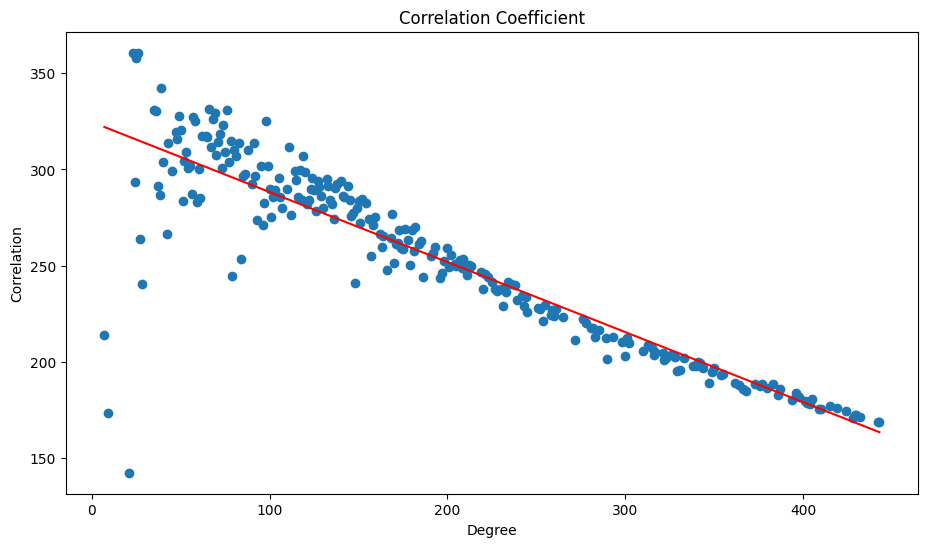

The Assortativity Coefficient of the Graph G:  -0.3896650830699432


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def Calculate_Degree_Correlation(G):
    node_degree_values = G.degree()
    unique_degrees = list(set([y for (x, y) in node_degree_values]))
    Degree_Correlation = {}

    for degree in unique_degrees:
        nodes_kdegree = [x for (x, y) in node_degree_values if y == degree]
        count_nodes_kdegree = len(nodes_kdegree)

        final_degree_sum = 0

        for node in nodes_kdegree:
            Neighbours = list(G.neighbors(node))

            degree_sum = sum(G.degree[neighbour] for neighbour in Neighbours)

            if len(Neighbours) > 0:
                node_average_degree = degree_sum / len(Neighbours)
            else:
                node_average_degree = 0

            final_degree_sum += node_average_degree

        correlation = final_degree_sum / count_nodes_kdegree if count_nodes_kdegree > 0 else 0

        Degree_Correlation[degree] = correlation

    return Degree_Correlation

# Calculate Degree Correlation for graph G
Degree_Correlation = Calculate_Degree_Correlation(G)
Degree_Values = list(Degree_Correlation.keys())
Degree_Correlation_Values = list(Degree_Correlation.values())

# Plotting the Degree vs Correlation
plt.figure(figsize=(11, 6))
plt.scatter(Degree_Values, Degree_Correlation_Values)
plt.xlabel("Degree")
plt.ylabel("Correlation")

# Fit line
m, b = np.polyfit(np.array(Degree_Values), np.array(Degree_Correlation_Values), 1)
plt.plot(np.array(Degree_Values), m * np.array(Degree_Values) + b, color='r')

plt.title("Correlation Coefficient")
plt.show()

# Calculate and print the assortativity coefficient for graph G
assortativity_coefficient = nx.degree_pearson_correlation_coefficient(G)
print("The Assortativity Coefficient of the Graph G: ", assortativity_coefficient)

In [31]:
import networkx as nx
import numpy as np
import pandas as pd

# Load the CSV to get node names
node_data = pd.read_csv('reachability-meta.csv')
node_name_mapping = dict(zip(node_data['node_id'], node_data['name']))

# Assuming G is the directed graph
# Convert the directed graph G to undirected
G_Undirected = G.to_undirected()

# Display basic information
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes in the graph:", G.nodes())
print("Edges in the graph:", G.edges())

# If G is undirected, calculate connected components
if not G.is_directed():
    connected_components = list(nx.connected_components(G))
    print("Number of connected components:", len(connected_components))
    for i, component in enumerate(connected_components):
        print(f"Component {i + 1}: {component}")

print('Num connected components:', nx.number_connected_components(G_Undirected))

def Calculate_Network_Degree(G_Undirected):
    node_degree_values = G_Undirected.degree()
    weighted_node_degree_values = G_Undirected.degree(weight='weight')

    degree_values = [val for (node, val) in node_degree_values]
    weighted_degree_values = [val for (node, val) in weighted_node_degree_values]

    average_degree = np.sum(degree_values) / len(degree_values)
    weighted_average_degree = np.sum(weighted_degree_values) / len(weighted_degree_values)

    return average_degree, weighted_average_degree, node_degree_values, weighted_node_degree_values

# Calculate degree values
average_degree, weighted_average_degree, node_degree_values, weighted_node_degree_values = Calculate_Network_Degree(G_Undirected)

print("The Average Degree of the Network:", average_degree)
print("\nThe Weighted Average Degree of the Network:", weighted_average_degree)

# Prepare aligned printing format
print("\nThe 4 nodes with the highest degree (most accessible nodes) in the Network are:")
highest_degree = sorted(G_Undirected.degree, key=lambda x: x[1], reverse=True)[:4]
print(f"{'Node ID':<10}{'Node Name':<20}{'Degree':<10}")
print("-" * 40)
for node, degree in highest_degree:
    node_name = node_name_mapping.get(node, "Unknown")
    print(f"{node:<10}{node_name:<20}{degree:<10}")

print("\nThe 4 nodes with the highest weighted degree in the Network are:")
highest_weighted_degree = sorted(G_Undirected.degree(weight='weight'), key=lambda x: x[1], reverse=True)[:4]
print(f"{'Node ID':<10}{'Node Name':<20}{'Weighted Degree':<15}")
print("-" * 45)
for node, weighted_degree in highest_weighted_degree:
    node_name = node_name_mapping.get(node, "Unknown")
    print(f"{node:<10}{node_name:<20}{weighted_degree:<15}")


Number of nodes: 456
Number of edges: 37947
Nodes in the graph: [27, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 26, 28, 29, 32, 33, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 142, 143, 144, 145, 147, 149, 150, 151, 152, 153, 154, 156, 157, 159, 160, 162, 163, 164, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 206, 207, 209, 210, 211, 212, 214, 215, 217, 219, 221, 222, 223, 224, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

In [38]:
import networkx as nx
import pandas as pd
import numpy as np

# Load edge data with city travel times and construct the directed graph
edge_data = pd.read_csv('reformatted_reachability.txt', sep=' ')
G = nx.from_pandas_edgelist(edge_data, 'FromNodeId', 'ToNodeId', ['Weight'], create_using=nx.DiGraph())

# Assume Weight represents travel time, so rename it for clarity
edge_data['TravelTime'] = edge_data['Weight'].abs()  # Ensure travel time is positive

# Find the longest and shortest routes based on travel time
longest_route = edge_data[edge_data['TravelTime'] == edge_data['TravelTime'].max()]
shortest_route = edge_data[edge_data['TravelTime'] == edge_data['TravelTime'].min()]

# Print longest and shortest travel routes
print('Longest travel route:', longest_route['TravelTime'].iloc[0], 'minutes. From City ID:',
      longest_route['FromNodeId'].iloc[0], 'to', longest_route['ToNodeId'].iloc[0])
print('Shortest travel route:', shortest_route['TravelTime'].iloc[0], 'minutes. From City ID:',
      shortest_route['FromNodeId'].iloc[0], 'to', shortest_route['ToNodeId'].iloc[0])

# Initialize metrics for max and min travel times between consecutive flights for each flight route
max_travel_time_between_stops = 0
min_travel_time_between_stops = edge_data['TravelTime'].max()
average_route_travel_time = 0
average_travel_time_between_stops = 0

# Unique cities to consider each route individually
cities = edge_data['FromNodeId'].unique()

# Iterate over all routes starting from each city
for city in cities:
    city_routes = edge_data[edge_data['FromNodeId'] == city]
    travel_times = city_routes['TravelTime'].values

    # Calculate travel time differences between consecutive stops
    for i in range(len(travel_times) - 1):
        stop_time_diff = abs(travel_times[i + 1] - travel_times[i])
        if stop_time_diff > max_travel_time_between_stops:
            max_travel_time_between_stops = stop_time_diff
            max_stop_city = city
        if stop_time_diff < min_travel_time_between_stops and stop_time_diff > 0:
            min_travel_time_between_stops = stop_time_diff
            min_stop_city = city

    # Total route travel time for this city
    average_route_travel_time += travel_times.sum()

# Calculate averages
average_route_travel_time /= len(cities)
average_travel_time_between_stops = average_route_travel_time / edge_data.shape[0]

# Print results
print("Maximum travel time difference between consecutive stops:", max_travel_time_between_stops,
      "minutes, starting from City ID:", max_stop_city)
print("Minimum travel time difference between consecutive stops:", min_travel_time_between_stops,
      "minutes, starting from City ID:", min_stop_city)
print("Average total route travel time:", round(average_route_travel_time, 2), "minutes")
print("Average travel time between consecutive stops:", round(average_travel_time_between_stops, 2), "minutes")


Longest travel route: 2855 minutes. From City ID: 176 to 401
Shortest travel route: 10 minutes. From City ID: 58 to 88
Maximum travel time difference between consecutive stops: 2358 minutes, starting from City ID: 176
Minimum travel time difference between consecutive stops: 1 minutes, starting from City ID: 57
Average total route travel time: 54931.4 minutes
Average travel time between consecutive stops: 0.76 minutes
